In [1]:
#Clone the yolovV3  from GitHub and its libraries and roboflow to apply yolov3.
!git clone https://github.com/ultralytics/yolov3  # clone
%cd yolov3
%pip install -r requirements.txt
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov3'...
remote: Enumerating objects: 10903, done.
remote: Counting objects: 100% (825/825), done.
remote: Compressing objects: 100% (399/399), done.
remote: Total 10903 (delta 562), reused 647 (delta 425), pack-reused 10078
Receiving objects: 100% (10903/10903), 9.85 MiB | 21.20 MiB/s, done.
Resolving deltas: 100% (7361/7361), done.
/content/yolov3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.6/615.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.5 MB/s

In [4]:
#Set an environment variable called DATASET_DIRECTORY to specify where the dataset will be stored.
os.environ["DATASET_DIRECTORY"]="/content/dataset"

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eDABWTiByXQp2MWKlj8H")
project = rf.workspace("cairo-uni").project("detect-ucqpe")
dataset = project.version(1).download("yolov5")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/dataset/detect-1 in yolov5pytorch:: 100%|██████████| 165/165 [00:00<00:00, 7326.33it/s]


In [6]:
#Run the train.py script from the yolov5 repository, passing in various options including the image size,
#number of epochs, location of the data file, starting weights file, and whether to use caching.

!python train.py --img 416  --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/dataset/detect-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 16000, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 16000 (delta 20), reused 20 (delta 12), pack-reused 15967
Receiving objects: 100% (16000/16000), 14.66 MiB | 22.98 MiB/s, done.
Resolving deltas: 100% (10982/10982), done.
From https://github.com/ultralytics/yolov5
 * [new branch]        

In [9]:
#Run the detect.py script from the yolov5 repository, passing in various options including the location of the weights file,
#image size, confidence threshold, and source directory for the images to detect objects in.
!python detect.py --weights /content/yolov3/runs/train/exp/weights/best.pt --conf 0.6 --source {dataset.location}/valid/images

detect: weights=['/content/yolov3/runs/train/exp/weights/best.pt'], source=/content/dataset/detect-1/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-114-gecd5112d Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/6 /content/dataset/detect-1/valid/images/youtube-13_jpg.rf.c3810d979b1c79dae3f0c0ad0328fad0.jpg: 640x640 1 backbag, 11 persons, 11.5ms
image 2/6 /content/dataset/detect-1/valid/images/youtube-21_jpg.rf.2453c4dcdcdc404ec3c1c9838155c82b.jpg: 640x640 2 backbags, 10 persons, 11.6ms
image 3/6 /content/dat

In [10]:
import glob
from IPython.display import Image, display


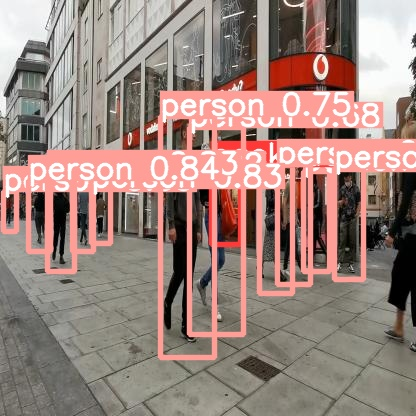

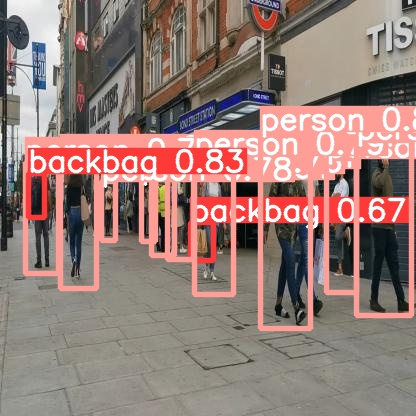

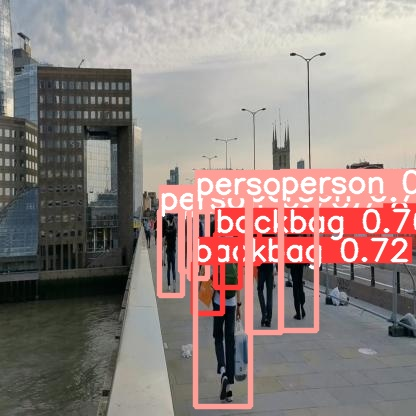

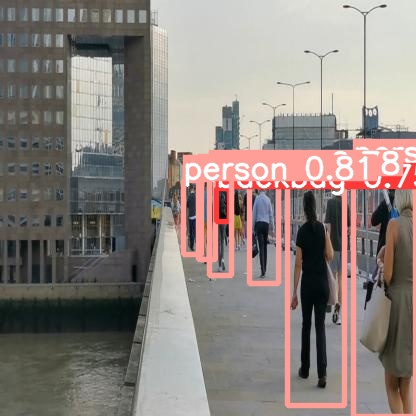

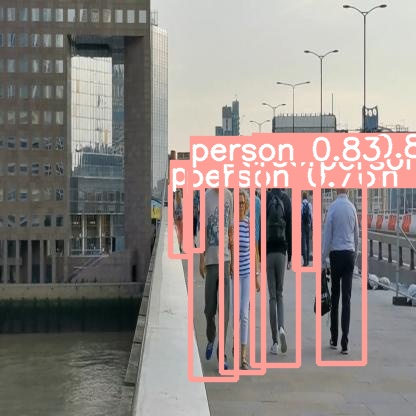

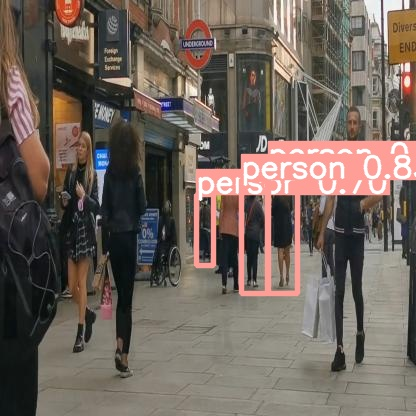

In [11]:
#display the results Images with boundry boxes around detected objects.
for imageName in glob.glob('/content/yolov3/runs/detect/exp/*.jpg'):
    display(Image(filename=imageName))
    print("\n")